# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

athletes.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [16]:
#Amostra da variável height
sample = get_sample(athletes, 'height', n=3000, seed=42)

#Amostra da variável weight
sample_weight = get_sample(athletes, 'weight', n=3000, seed=42)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q1():    
     
    #Teste de normalidade dos dados (Shapiro-Wilk test)
    shapiro_resul = sct.shapiro(sample)
    
    # Hipótese Nula (H0) = Os dados seguem uma distribuição normal - alpha > 0.05
    # Hipótese Alternativa(Ha) = Os dados não seguem uma distribuição normal -alpha < 0.05
    
    #Significância
    alpha = 0.05
    
    resul = shapiro_resul[1] >= alpha
    return resul

    pass
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
#### Aparentemente não, pois é uma distribuição que segue próxima da normalidade. Entretanto, é possível verificar a presença de outliers, os quais contribuem para rejeitar a hipótese nula à um nível de siginificância de 5%. Estatisticamente, o valor p encontrado indica que há evidências suficientes para afimar que a distribuição dos dados é diferente de uma distribuição normal. 

* Plote o qq-plot para essa variável e a analise.

#### Fica evidente a presença de outliers nos dados que contribuem para rejeitar H0. 

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

#### Diminuir o nível de significância neste caso, implicaria em aumentar o poder estatístico do teste e então, falhar em rejeitar a hipótese nula (falsa).Ocorreria o erro do tipo II.

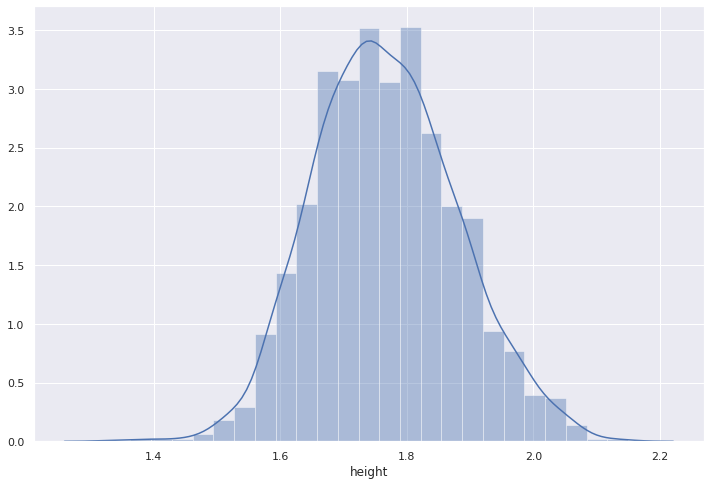

In [13]:
# Distribuição da variável height

sns.distplot(sample, kde=True, bins=25);

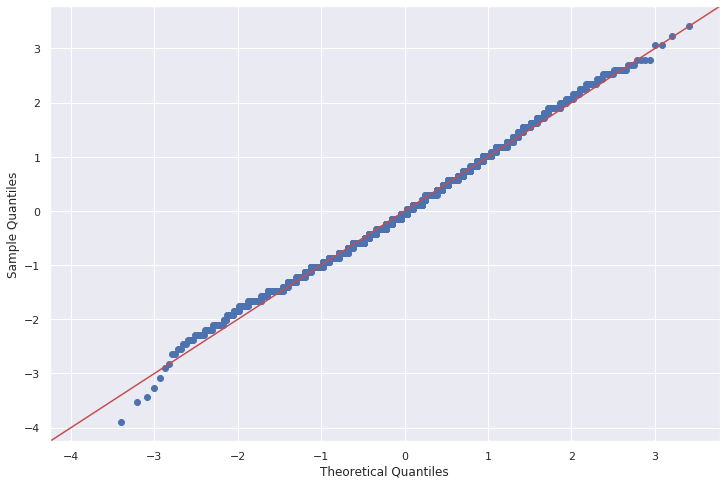

In [14]:
# QQPLOT

import statsmodels.api as sm

sm.qqplot(sample, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [165]:
def q2():
    
    #Estatística de teste Jarque Bera
    jarque_resul = sct.jarque_bera(sample)

    # Hipótese Nula (H0) = Os dados seguem uma distribuição normal - alpha > 0.05
    # Hipótese Alternativa(Ha) = Os dados não seguem uma distribuição normal -alpha < 0.05
    
    #Significância
    alpha = 0.05

    resul2 = jarque_resul[1] >= alpha
    
    return bool(resul2)
    
    pass
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

### Confirma a hipótese que existem fortes evidências para rejeitar H0, considerando o estimador amostral.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
def q3():
    
    # Aplicação da estatística de teste de normalidade (D'Agostino-Pearson)
    normal_test = sct.normaltest(sample_weight)
    
    #Hipótese Nula (H0) = Os dados seguem uma distribuição normal - alpha > 0.05
    # Hipótese Alternativa(Ha) = Os dados não seguem uma distribuição normal -alpha < 0.05
    
    #Significância
    alpha = 0.05
    
    normal_resul = normal_test[1] >= alpha
    
    return bool(normal_resul)
        
    pass
q3()

False

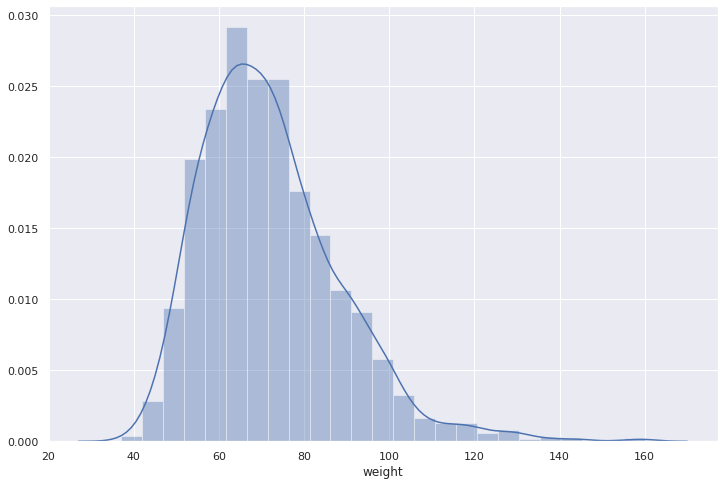

In [18]:
#Histrograma da variável Weight

sns.distplot(sample_weight, bins = 25, kde = True)

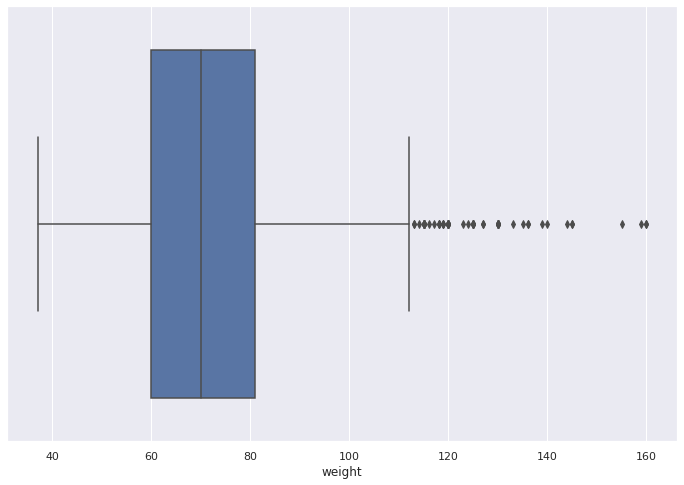

In [19]:
# Box plot da variável Weight

sns.boxplot(sample_weight)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

### Sim. É possível verificar a assimetria positiva na distribuição dos dados, o que torna possível inferir a partir do valor-p que há fortes evidências para rejeitar H0. Os dados não seguem uma distribuição normal.
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
def q4():
    #Transformação logarítmica
    log_sample_weight = np.log(sample_weight)
    
    #Teste de normalidade após a transformação
    log_normal = sct.normaltest(log_sample_weight)
    
    #Significância
    alpha = 0.05
    
    resul3 = log_normal[1] >= alpha
    
    return bool(resul3)
    pass
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

### A transformação dos dados para a base logarítmica não é significante para apromixar a distribuição dos dados de uma distribuição normal

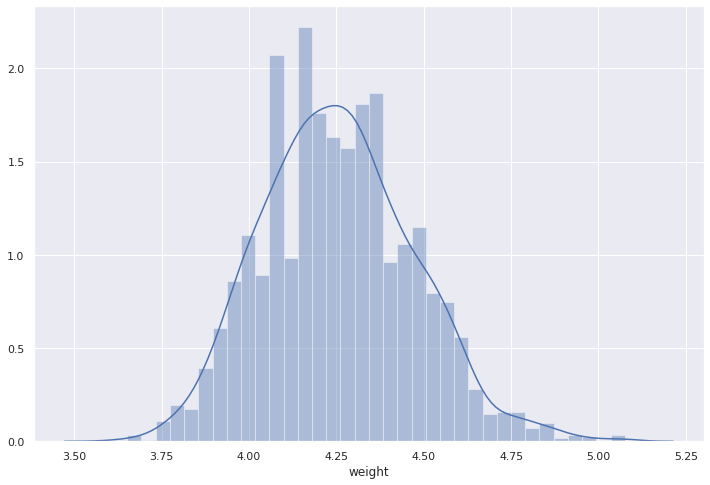

In [144]:
# Histograma da variável Weigh transformada em logarítimica
log_sample_weight = np.log(sample_weight)

sns.distplot(log_sample_weight, kde = True)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [21]:
# Amostras entre nacionalidades dos atletas: Canadenses, Brasileiros e Norte-Americanos
can = athletes.loc[athletes['nationality'] == 'CAN']['height'].dropna()
bra = athletes.loc[athletes['nationality'] == 'BRA']['height'].dropna()
usa = athletes.loc[athletes['nationality'] == 'USA']['height'].dropna()

# Tamanho da amostra dos atletas brasileiros:
print(len(bra))

# Tamanho da amostra dos atletas norte-americanos:
print(len(usa))

# Tamanho da amostra dos atletas canadenses:
print(len(can))

476
560
320


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [22]:
def q5():
        
    #Teste t-student entre as médias amostrais das alturas entre os atletlas brasileiros e norte-americanos.
    # Conforme as estatíticas anteriores, assume-se que as médias possuem tamanho e variância diferentes,
    #logo,o teste apropriado é o de Welch's test. 
    
    #Para tanto, é necessário ajustar o parâmetro equal_var = False.
    
    #Welch's t-test
    test_bra_usa = sct.ttest_ind(bra,usa, equal_var= False)

    #Significância
    alpha = 0.05
      
    resul_t_test = test_bra_usa[1]>= alpha   
    
    return bool(resul_t_test)
    pass
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [23]:
def q6():
       
    #Welch's t-test
    test_bra_can = sct.ttest_ind(bra,can, equal_var= False)
    
    #Significância
    alpha = 0.05

    resul_t_test2 = test_bra_can[1]>= alpha   
    
    return bool(resul_t_test2)
    
    pass
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [8]:
def q7(): 
  
    #Welch's t-test
    test_usa_can = sct.ttest_ind(usa,can, equal_var= False)

    resul_t_test3 = round(test_usa_can[1],8)   
    
    return float(resul_t_test3)
    pass
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?

#### Sim. O tamanho das amostras e a variância implica diretamente na distribuição dos dados, como pode ser obervado nos testes anteriores.

* Você consegue interpretar esse p-valor?

#### A probabilidade de encontrar uma diferença significativa entre as 2 médias amostrais do teste é de 0.00046601 do tempo quando a hipótese nula é verdadeira
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?
#### 

